# Tugas 4 Pemrosesan Citra Digital - Edge Detection
Nama : Aso Ahmad Amin Rais

NIM  : H071191037

In [12]:
#import package yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import imageio
import colorsys
import sys
import scipy.ndimage as nd
from PIL import Image
import mgcreate
import edge
import color

#konversi warna 
rgb_to_hsv = np.vectorize(colorsys.rgb_to_hsv)
hsv_to_rgb = np.vectorize(colorsys.hsv_to_rgb)

### 1. Buat gambar bernilai biner yang berisi *square anulus* (gunakan fungsi **SquareAnnulus** dengan nilai default dari modul *mgcreate* di perangkat lunak yang disediakan). Citra yang digunakan adalah $ a[\vec{x}] $ dan terapkan pengurangan berikut untuk mendapatkan versi citra *edge-enhanced*



$$\mathrm{\mathbf{b}}[\vec{x}] = 
\left|
\mathrm{\mathbf{a}}[\vec{x}] - D_{(1,1)}\mathrm{\mathbf{a}}[\vec{x}]
\right|
$$



> **Jawaban**





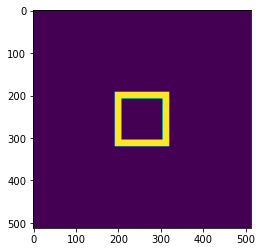

In [13]:
#Memuat Square Abylus
g1 = mgcreate.SquareAnnulus()
plt.imshow(g1)

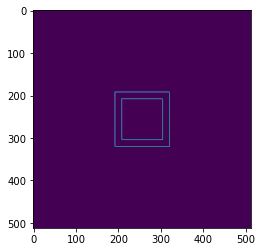

In [14]:
#Menerapkan Pengurangan pada citra
g1_d = nd.shift(g1,(1,1))
g1_bx = np.abs(g1 - g1_d)
plt.imshow(g1_bx)

### 2. Buat gambar bernilai biner yang berisi *square anulus* (gunakan fungsi **SquareAnnulus** dengan nilai default dari modul *mgcreate* di perangkat lunak yang disediakan). Citra yang digunakan adalah $ a[\vec{x}] $ dan terapkan pengurangan berikut untuk mendapatkan versi citra *edge-enhanced*

$$\mathrm{\mathbf{b}}[\vec{x}] = 
\mathrm{\mathbf{a}}[\vec{x}] - D_{(1,1)}\mathrm{\mathbf{a}}[\vec{x}]
$$

###Perhatikan bahwa ini sedikit berbeda dari masalah sebelumnya karena nilai absolut tidak dihitung.

> **Jawaban**




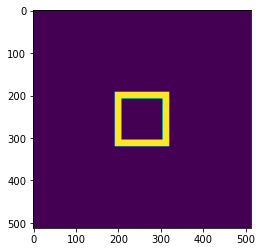

In [15]:
#Memuat Square Abylus
g2 = mgcreate.SquareAnnulus()
plt.imshow(g2)

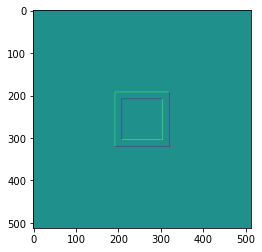

In [16]:
#Menerapkan Pengurangan pada citra
g2_d = nd.shift(g2,(1,1))
g2_bx = g2 - g2_d
plt.imshow(g2_bx)

### 3. Gunakan Citra 
$\mathrm{\mathbf{a}}[\vec{x}] = Y\left(\mathrm{'data/banana.jpeg'}\right)$.
###Hitung persamaan berikut ini:
$$\mathrm{\mathbf{b}}[\vec{x}] = 
E_{m}\begin{Bmatrix}
\varnothing \\
\varnothing \\
1 \\
\end{Bmatrix}
\mathcal{L}_{HSV}\mathrm{\mathbf{a}}[\vec{x}]$$

$$\mathrm{\mathbf{c}}[\vec{x}] = 
\begin{Bmatrix}
1 \\
\varnothing \\
\varnothing
\end{Bmatrix}
\mathcal{L}_{HSV}\mathrm{\mathbf{a}}[\vec{x}]$$

$$\mathrm{\mathbf{d}}[\vec{x}] = 
\begin{Bmatrix}
\varnothing \\
1 \\
\varnothing
\end{Bmatrix}
\mathcal{L}_{HSV}\mathrm{\mathbf{a}}[\vec{x}]$$

$$\mathrm{\mathbf{f}}[\vec{x}] = 
\mathcal{L}_{RGB}\begin{Bmatrix}
\mathrm{\mathbf{c}}[\vec{x}] \\
\mathrm{\mathbf{d}}[\vec{x}] \\
1
\end{Bmatrix}
$$

$$
\mathrm{\mathbf{g}}[\vec{x}] = 
\mathrm{\mathbf{\alpha}}\mathrm{\mathbf{f}}[\vec{x}] +
(1 - \mathrm{\mathbf{\alpha}})\mathrm{\mathbf{b}}[\vec{x}]/\bigwedge \mathrm{\mathbf{b}}[\vec{x}]
$$



> **Jawaban**



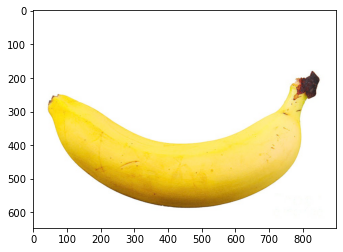

In [17]:
# Memuat gambar banana.jpeg
g3 = imageio.imread('banana.jpeg').astype('float64')/255
plt.imshow(g3)

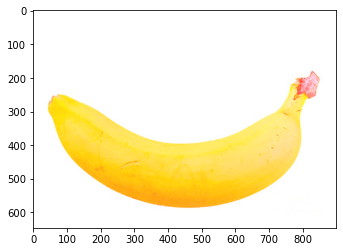

In [18]:
# Konversi Gambar ke HSV
g3_h, g3_s, g3_v = rgb_to_hsv(g3[...,0], g3[...,1], g3[...,2])

# Mengekstrak ke kanal v serta dilakukan edge Operator
g3_bx = edge.Sobel(g3_v)
# Mengekstrak ke kanal h
g3_cx = g3_h
# Mengekstrak kanal S
g3_dx = g3_s

#Membuat gambar RGB dari HSV tetapi kanal ke 3 
g3_r, g3_g, g3_b = hsv_to_rgb(g3_cx, g3_dx, np.full((g3.shape[0], g3.shape[1]), 1.0))
g3_fx = np.dstack((g3_r, g3_g, g3_b))
plt.imshow(g3_fx)

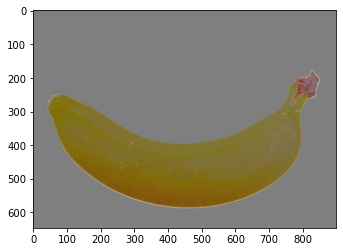

In [19]:
# Membuat Citra
alpha_3 = 0.5
g3_temp = ((1-alpha_3)*g3_bx)/g3_bx.max()
g3_gx = (alpha_3*g3_fx) + np.dstack((g3_temp,g3_temp,g3_temp))
plt.imshow(g3_gx)

### 4. Buat gambar bernilai biner yang berisi *square anulus* (gunakan fungsi **SquareAnnulus** dengan nilai default dari modul *mgcreate* di perangkat lunak yang disediakan). Citra yang digunakan adalah $ a[\vec{x}] $ dan terapkan pengurangan berikut untuk mendapatkan versi citra *edge-enhanced*

$$\mathrm{\mathbf{b}}[\vec{x}] = 
\left|
\mathrm{\mathbf{a}}[\vec{x}] - D_{(2,-2)}\mathrm{\mathbf{a}}[\vec{x}]
\right|
$$



> **Jawaban**


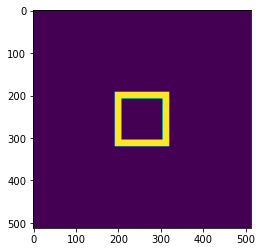

In [20]:
#Memuat Gambar
g4 = mgcreate.SquareAnnulus()
plt.imshow(g4)

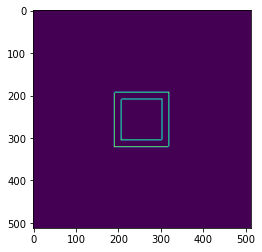

In [21]:
# Menerapkan Pengurangan pada citra
g4_bx = np.abs(g4 - (nd.shift(g4,(2,-2))))
plt.imshow(g4_bx)

### 5.Tulis notasi operator yang menerima gambar abu-abu $ a[\vec{x}] $, dan kemudian buat versi citra dengan *smooth the edge-enhanced*



> **Jawaban**

Operator yang dapat digunakan untuk problem ini adalah

$$ 
\mathrm{\mathbf{b}}[\vec{x}] = 
\mathcal{S_{m}}E_{m}\mathcal{L}_{L}
\mathrm{\mathbf{a}}[\vec{x}]
$$


Implementasi Operator dalam Program



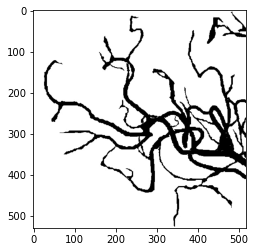

In [22]:
#Memuat gamabar Abu-abu
g5 = imageio.imread('smother.jpeg', as_gray=True)
plt.imshow(g5, cmap="gray")

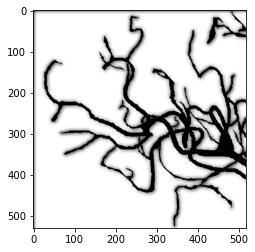

In [23]:
#Operasi mendapatkan edge
g5_d = abs(g5 - nd.shift(g5,(1,1),order=0))

#Smooth terhadap edge
g5_fil = nd.gaussian_filter(g5_d+0.0,4)
g5_mask = 1 - g5_fil/g5_fil.max()

#Mengalikan hasil smooth dengan gambar awal
g5_output = g5*g5_mask
plt.imshow(g5_output, cmap="gray")

### 6. Gunakan $\mathrm{\mathbf{a}}[\vec{x}] = Y\left(\mathrm{'data/banana.jpeg'}\right)$, dan  terapkan algoritma *Sobel edge enhancement* untuk perhitungan berikut ini:

$$\mathrm{\mathbf{b}}[\vec{x}] = 
E_{m}\begin{Bmatrix}
1 \\
\varnothing \\
\varnothing \\
\end{Bmatrix}
\mathcal{L}_{RGB}\mathrm{\mathbf{a}}[\vec{x}]$$

$$\mathrm{\mathbf{c}}[\vec{x}] = 
E_{m}\begin{Bmatrix}
\varnothing \\
1 \\
\varnothing
\end{Bmatrix}
\mathcal{L}_{RGB}\mathrm{\mathbf{a}}[\vec{x}]$$

$$\mathrm{\mathbf{d}}[\vec{x}] = 
E_{m}\begin{Bmatrix}
\varnothing \\
\varnothing\\
1
\end{Bmatrix}
\mathcal{L}_{RGB}\mathrm{\mathbf{a}}[\vec{x}]$$

$$\mathrm{\mathbf{f}}[\vec{x}] = 
\mathrm{\mathbf{b}}[\vec{x}] +
\mathrm{\mathbf{c}}[\vec{x}] +
\mathrm{\mathbf{d}}[\vec{x}]
$$


> **Jawaban**



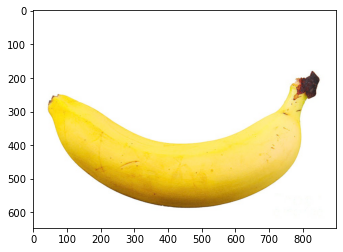

In [24]:
g6 = imageio.imread('banana.jpeg').astype('float64')/255
plt.imshow(g6)

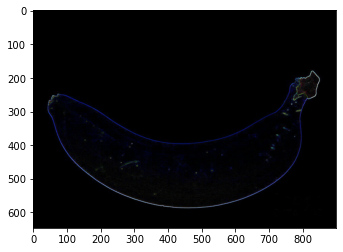

In [25]:
# Kanal red
g6_r = g6[...,0]
# Kanal Green
g6_g = g6[...,1]
# Kanal Blue
g6_b = g6[...,2]

# Lakukan Edge Sobel Filter ke Tiap gambar 
g6_bx = edge.Sobel(g6_r)
g6_cx = edge.Sobel(g6_g)
g6_dx = edge.Sobel(g6_b)

# Buat gambar Baru Dengan Menggabungkan tiap Kanal
g6_fx = np.dstack((g6_bx, g6_cx, g6_dx))
# Normalize Citra
g6_fx = g6_fx/g6_fx.max()
plt.imshow(g6_fx)

### 7.Misalkan  $b[\vec{x}] = E_{m}{a}[\vec{x}]$, dimana $ m $ menggunakan fungsi **DerivEdge**. Argumen kedua untuk fungsi ini adalah $ (k,k) $, dimana $ k $ adalah jumlah pergeseran yang sama di kedua dimensi. Nilai $ k $ yang mana yang menghasilkan nilai piksel maksimum di $ \mathrm{\mathbf{b}}[\vec{x}] $? Mengapa?

> **Jawaban**

Nilai $\mathrm{\mathbf{b}}[\vec{x}]$ akan memiliki nilai pixel maksimum ketika $k \ge min(Za[\vec{x}])$ atau  $k \le -min(Za[\vec{x}])$ hal ini dikarenakan saat keadaan ini terjadi maka ketika pergeseran dilakukan oleh fungsi **DerivEdge** maka tidak pengurangan terhadap citra awal, sehingga maxmium piksel dari citra yang dihasilkan akan tetap sama dengan citra awal.


untuk implementasinya dapat dilihat pada contoh berikut

In [26]:
#Memuat Citra
g7 = mgcreate.Checkerboard()
# Mnimum Dimensi
minDimension = min(np.array(g7.shape))
minDimension

512

In [27]:
#Nilai Pixel Mksimum Dari Citra
g7.sum()

131072.0

In [28]:
# Perbandingan Perubahan Nilai Pixel

#k = 1
print('k=1 : ',edge.DerivEdge(g7,(1,1)).sum())
#k = 511
print('\nk=511 : ', edge.DerivEdge(g7,(511,511)).sum())
#k = 512
print('\nk=512 : ',edge.DerivEdge(g7,(512,512)).sum())
#k = -600
print('\nk=-600 : ', edge.DerivEdge(g7,(-600,-600)).sum())

k=1 :  15391.0

k=511 :  131071.0

k=512 :  131072.0

k=-600 :  131072.0


Dapat dilihat bahwa saat k=1 nilai pixelnya itu jauh dari maksimum pixel atau nilai pixel citra awal. Pada saat k=511 nilai pixel mendekati maksimum tetapi masih lebih kecil dari pixel maksimum. Nah saat citra $k=512 >= min(Za[\vec{x}])$ dan saat $k=-600 <= -min(Za[\vec{x}])$ maka nilai pixel dari citranya akan maksimum atau sama dengan citra awal sebelum di shift


Jadi Semua Nilai $k$ yang memenuhi adalah $k\ge min(Za[\vec{x}])$ dan $k\le min(Za[\vec{x}])$

### 8. Gunakan fungsi **Checkerboard** yang telah diseiakan modul *mgcreate* to untuk membuat *checkerboard pattern* $\mathrm{\mathbf{a}}[\vec{x}]$.  Gunakan fungsi **DerivEdge**,  hitung *edge-enhanced*  dari citra $\mathrm{\mathbf{b}}[\vec{x}] = E_{m}\mathrm{\mathbf{a}}[\vec{x}]$ dengan *shift* dari $(1,1)$. Ulangi percobaan yang sama dengan *shift* dari $(32,32)$. Jelaskan kenapa outputnya berbeda.



> **Jawaban**



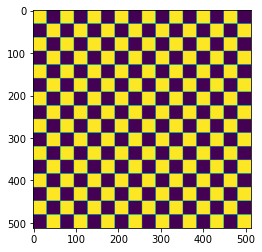

In [29]:
g8 = mgcreate.Checkerboard()
plt.imshow(g8)

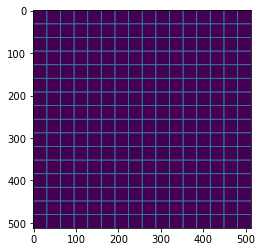

In [30]:
g8_bx = edge.DerivEdge(g8, (1,1))
plt.imshow(g8_bx)

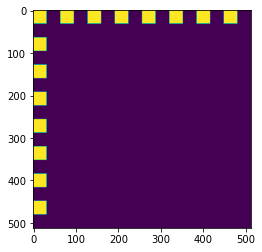

In [31]:
g8_bx = edge.DerivEdge(g8, (32,32))
plt.imshow(g8_bx)

Fungsi DerivEdge Diketahui seperti berikut


```
def DerivEdge( indata, dvh ):
  b = nd.shift( indata + 0.0, dvh, order=0, cval=0 ) 
  answ = abs(indata - b)
  return answ
```
Dapat Dilihat bahwa DerivEdge Melakukan shif terhadap citra kemudian mengembalikan selesihnya dengan citra awal.
Dari sini kita bisa menelaah dengan jelas bahwa jika shiftnya berbeda tentu citra yang dikembalikan juga berbeda

Output dari kedua proses ini berbeda karena pada proses pertama dilakukan deriveedge dengan pergeseran $(1,1)$ artinya citranya bergerak 1 piksel pada sumbu x, dan, 1 piksel pula pada sumbu y, sehingga selisih dengan citra awal tidak terlalu jauh yang menyebabkan outputnya dapat menunjukkan tepi dengan jelas. Sedangkan proses kedua dilakukan deriveedge dengan pergeseran $(32,32)$ bergerak 32 piksel pada sumbu x, dan 32 piksel pada sumbu y yang mana peregeseran ini lebih besar dari ukuran kotak itu sendiri maka selisih dari citra tidak akan menunjukkan tepi citra lagi, tapi malah menghilangkan sebagian piksel dari citra. 

### 9. Diberikan citra inputan $\mathrm{\mathbf{a}}[\vec{x}]$ dari fungsi **Homeplate** di modul *mgcreate*. Hitung $\mathrm{\mathbf{b}}[\vec{x}]$ dengan $$\mathrm{\mathbf{b}}[\vec{x}] = E_{m}\mathrm{\mathbf{a}}[\vec{x}]$$ dimana $m$ adalah algoritma *Sobel edge enhancement*. Buat citra $\mathrm{\mathbf{c}}[\vec{x}]$ dengan,$$\mathrm{\mathbf{c}}[\vec{x}] = \Gamma_{5.5}\mathrm{\mathbf{b}}[\vec{x}]$$

> **Jawaban**

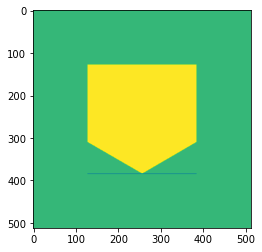

In [32]:
g9 = mgcreate.Homeplate().astype('float64')
plt.imshow(g9)

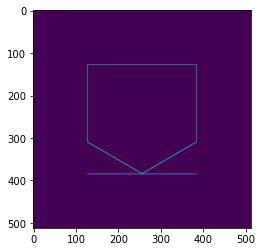

In [33]:
#sobel filter ke citra
g9_bx = edge.Sobel(g9)
plt.imshow(g9_bx)

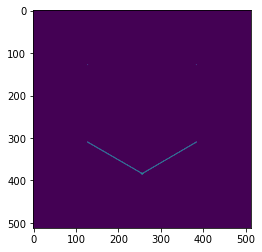

In [34]:
# thresshold dengan hanya mengambil value yang > 5.5
g9_cx = (g9_bx > 5.5)
plt.imshow(g9_cx)

### 10. Gunakan citra $\mathrm{\mathbf{a}}[\vec{x}] = Y\left(\mathrm{'data/banana.jpeg'}\right)$. Lakukan perhitungan berikut:

$$\mathrm{\mathbf{b}}[\vec{x}] = 
E_{m}\begin{Bmatrix}
1 \\
\varnothing \\
\varnothing \\
\end{Bmatrix}
\mathcal{L}_{YUV}\mathrm{\mathbf{a}}[\vec{x}]$$

$$\mathrm{\mathbf{c}}[\vec{x}] = 
E_{m}\begin{Bmatrix}
\varnothing \\
1 \\
\varnothing
\end{Bmatrix}
\mathcal{L}_{YUV}\mathrm{\mathbf{a}}[\vec{x}]$$

$$\mathrm{\mathbf{d}}[\vec{x}] = 
E_{m}\begin{Bmatrix}
\varnothing \\
\varnothing\\
1
\end{Bmatrix}
\mathcal{L}_{YUV}\mathrm{\mathbf{a}}[\vec{x}]$$

$$\mathrm{\mathbf{f}}[\vec{x}] = 
\mathrm{\mathbf{b}}[\vec{x}] +
\mathrm{\mathbf{c}}[\vec{x}] +
\mathrm{\mathbf{d}}[\vec{x}]
$$

> **Jawaban**

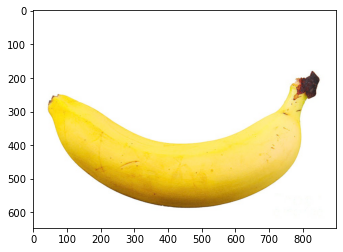

In [35]:
g10 = imageio.imread('banana.jpeg').astype('float64')/255
plt.imshow(g10)

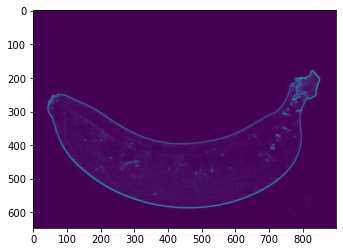

In [36]:
#Merubah warna Citra Ke YUV
g10_r, g10_g, g10_b = g10[...,0], g10[...,1], g10[...,2]
g10_y, g10_u, g10_v = color.RGB2YUV(g10_r, g10_g, g10_b)

#Sobel Filter ke Semua Citra
g10_bx = edge.Sobel(g10_y)
g10_cx = edge.Sobel(g10_u)
g10_dx = edge.Sobel(g10_v)

#menjumlahkan citra sebelumnya
g10_fx = g10_bx + g10_cx + g10_dx

#Normalize
g10_fx /= g10_fx.max()
plt.imshow(g10_fx)

### 11. Gunakan $\mathrm{\mathbf{a}}[\vec{x}] = Y\left(\mathrm{'data/banana.jpeg'}\right)$. Lakukan perhitungan berdasarkan:

$$\mathrm{\mathbf{b}}[\vec{x}] = 
E_{m}\begin{Bmatrix}
\varnothing \\
\varnothing \\
1 \\
\end{Bmatrix}
\mathcal{L}_{HSV}\mathrm{\mathbf{a}}[\vec{x}]$$

$$\mathrm{\mathbf{c}}[\vec{x}] = 
\begin{Bmatrix}
1 \\
\varnothing \\
\varnothing
\end{Bmatrix}
\mathcal{L}_{HSV}\mathrm{\mathbf{a}}[\vec{x}]$$

$$\mathrm{\mathbf{d}}[\vec{x}] = 
\begin{Bmatrix}
\varnothing \\
1 \\
\varnothing
\end{Bmatrix}
\mathcal{L}_{HSV}\mathrm{\mathbf{a}}[\vec{x}]$$

$$\mathrm{\mathbf{f}}[\vec{x}] = 
\mathcal{L}_{RGB}\begin{Bmatrix}
\mathrm{\mathbf{c}}[\vec{x}] \\
\mathrm{\mathbf{d}}[\vec{x}] \\
\varnothing
\end{Bmatrix}
$$

$$
\mathrm{\mathbf{g}}[\vec{x}] = 
\mathrm{\mathbf{\alpha}}\mathrm{\mathbf{f}}[\vec{x}] +
(1 - \mathrm{\mathbf{\alpha}})\mathrm{\mathbf{b}}[\vec{x}]
$$

>**Jawaban**

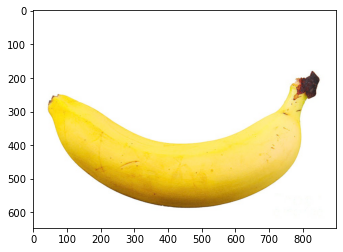

In [37]:
g11 = imageio.imread('banana.jpeg').astype('float64')/255
plt.imshow(g11)

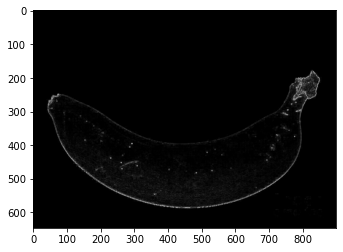

In [38]:
#konversi Citra ke HSV
g11_h, g11_s, g11_v = rgb_to_hsv(g11[...,0], g11[...,1], g11[...,2])

#Filter Sobel Ke Citra kanal v
g11_bx = edge.Sobel(g11_v)
#
g11_cx, g11_dx = g11_h, g11_s

#konversi Kembali Citra Ke RGB tapi mengisi kanal b dengan himpunan kosong
g11_r, g11_g, g11_b = hsv_to_rgb(g11_cx, g11_dx, np.zeros((g11.shape[0], g11.shape[1])))

#Buat Citra Dari kanal rgb baru
g11_fx = np.dstack((g11_r, g11_g, g11_b))

#operasi gx untuk mendapatkan citra hasil
alpha_11 = 0.5
g11_temp = ((1-alpha_11)*g11_bx)
g11_gx = (alpha_11* g11_fx) + np.dstack( ( g11_temp, g11_temp, g11_temp ) )

plt.imshow((g11_gx* 255).astype(np.uint8))

### 12. Gunakan citra $\mathrm{\mathbf{a}}[\vec{x}] = Y\left(\mathrm{'data/banana.jpeg'}\right)$, dan terapkan algoritma *Sobel edge enhancement* untuk melakukan perhitungan berikut:

$$ 
\mathrm{\mathbf{b}}[\vec{x}] = 
\mathrm{\mathbf{a}}[\vec{x}]-
E_{m}\mathcal{L}_{L}
\mathrm{\mathbf{a}}[\vec{x}]
$$

>**Jawaban**

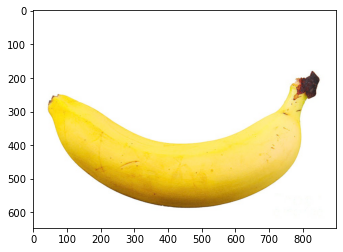

In [39]:
g12 = imageio.imread('banana.jpeg').astype('float64')/255
plt.imshow(g12)

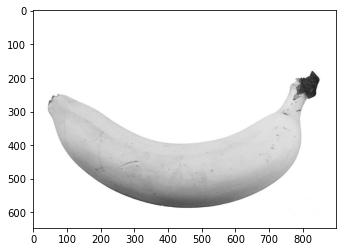

In [40]:
#Mengubah Citra Jadi Abu-Abu
g12_gray = 0.5 *g12[:,:,0] + 0.75*g12[:,:,1] + 0.25*g12[:,:,2]
plt.imshow(g12_gray, cmap="gray")

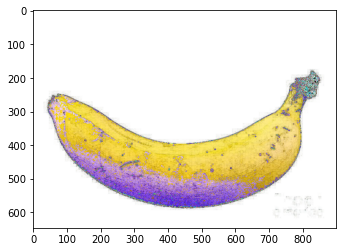

In [41]:
#filter dengan fungsi sobel 
g12_temp = edge.Sobel(g12_gray)
g12_bx = g12 -(np.dstack((g12_temp, g12_temp, g12_temp)))

plt.imshow((g12_bx * 255).astype(np.uint8))

## Link ke Google Collabs, Untuk melihat codenya https://colab.research.google.com/drive/1TIjQ41UVthIJ8LtHW7r1URYDLcoH0kAa?usp=sharing